## 0. CHORES: Setup the needs

Import the libs neededs in the later parts of the analysis, to avoid sharding them all over the place/

In [1]:
# file paths
import os

# for reading data and manipulation
import pandas as pd

# for viz and plots
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# for date and time
from datetime import datetime

In [2]:
# Setting up paths, so that script works regardless of platform and plcaement of script
dirname = os.getcwd()
loan_filepath = os.path.join(dirname, 'dataset/loan.csv')

In [3]:
loan_df = pd.read_csv(loan_filepath, low_memory=False)

## 1. Understand the data

Describe the data read in dataframe, get a very basic sense of data which will help in building understanding and come up with approach

In [4]:
loan_df.shape

(39717, 111)

In [5]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


_**Oberservation:** Looks like lot of nils are there are in dataframe, lets get a sense of how much._

In [7]:
loan_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

## 2. Data cleaning: Drop all the columns which are nil(s)

In previous we found there are lot of colmns which are fully nil, they don't add any value to the analysis hence droping them.

In [8]:
# drop all the columns which are all null, as they won't be of any use
loan_df = loan_df.dropna(axis=1, how='all')

In [9]:
# Converting term (in months), and int_rate (in %) to numeric values
loan_df['term_in_months'] = loan_df.term.apply(lambda term:  int(term.split('m')[0]) if len(term) > 1 else None)
loan_df['int_rate_percent'] = loan_df.int_rate.apply(\
                                                     lambda int_rate:  float(int_rate.split('%')[0])\
                                                     if len(int_rate) > 1 else None)

loan_df = loan_df.drop(['term', 'int_rate'], axis=1)

In [10]:
# Convert emp_length to a numeric value, so that it can used for analysis
def get_numeric_emp_length(length):
    if pd.isna(length) or 1 > len(length):
        return None
    number = int(''.join([n for n in length if n.isdigit()]))
    if length[0] == '<':
        return number - 0.5 # if  < is used, reduce by 0.5 year
    if '+' in length:
        return number + 0.5 # if + inc by 0.5 year
    return number
    

loan_df['emp_length'] = loan_df.emp_length.apply(lambda x: get_numeric_emp_length(x))

In [11]:
# convert dates 
# Jan-15
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df.earliest_cr_line = pd.to_datetime(loan_df.earliest_cr_line, format='%b-%y')
loan_df.last_pymnt_d = pd.to_datetime(loan_df.last_pymnt_d, format='%b-%y')
loan_df.last_credit_pull_d = pd.to_datetime(loan_df.last_credit_pull_d, format='%b-%y')
loan_df.next_pymnt_d = pd.to_datetime(loan_df.next_pymnt_d, format='%b-%y')

In [12]:
# drop cols with too many categorical values, useless text value
loan_df = loan_df.drop(['emp_title', \
                        'desc', \
                        'title', \
                        'initial_list_status', \
                        'url'], \
                       axis=1)

In [13]:
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_length,home_ownership,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_in_months,int_rate_percent
0,1077501,1296599,5000,5000,4975.0,162.87,B,B2,10.5,RENT,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,10.65
1,1077430,1314167,2500,2500,2500.0,59.83,C,C4,0.5,RENT,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60,15.27
2,1077175,1313524,2400,2400,2400.0,84.33,C,C5,10.5,RENT,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,15.96
3,1076863,1277178,10000,10000,10000.0,339.31,C,C1,10.5,RENT,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,13.49
4,1075358,1311748,3000,3000,3000.0,67.79,B,B5,1.0,RENT,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60,12.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,78.42,A,A4,4.0,MORTGAGE,...,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,36,8.07
39713,90665,90607,8500,8500,875.0,275.38,C,C1,3.0,RENT,...,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,36,10.28
39714,90395,90390,5000,5000,1325.0,156.84,A,A4,0.5,MORTGAGE,...,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,36,8.07
39715,90376,89243,5000,5000,650.0,155.38,A,A2,0.5,MORTGAGE,...,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,36,7.43


Still we see cols with significant nil values, but lets deal with them later when need arises.

## 3. Univariate analysis: Try to discover correlations between cols

In [14]:
# drop col which are not useful for basic stats 
loan_df_without_id = loan_df.copy().drop(['id', 'member_id'], axis=1)

loan_df_without_id.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_in_months,int_rate_percent
count,39717.000000,39717.000000,39717.000000,39717.000000,38642.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,...,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,5.147637,6.896893e+04,13.315130,0.146512,0.869200,35.900962,...,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0,42.418007,12.021177
std,7456.670694,7187.238670,7128.450439,208.874874,3.648818,6.379377e+04,6.678594,0.491812,1.070219,22.020060,...,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0,10.622815,3.724825
min,500.000000,500.000000,0.000000,15.690000,0.500000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,36.000000,5.420000
25%,5500.000000,5400.000000,5000.000000,167.020000,2.000000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,...,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,36.000000,9.250000
50%,10000.000000,9600.000000,8975.000000,280.220000,4.000000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,...,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,36.000000,11.860000
75%,15000.000000,15000.000000,14400.000000,430.780000,9.000000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,...,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,60.000000,14.590000
max,35000.000000,35000.000000,35000.000000,1305.190000,10.500000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,...,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,60.000000,24.590000


_**Observation:**_

1. Some columns are zero valued, they don't yeild any useful information: `tax_liens`, `delinq_amnt`, `chargeoff_within_12_mths`, `acc_now_delinq`, `collections_12_mths_ex_med`
2. `policy_code` is set to 1 that is also useless

In [15]:
# drop cols with all zero valued
loan_df = loan_df.drop(['tax_liens', \
                        'delinq_amnt', \
                        'chargeoff_within_12_mths', \
                        'acc_now_delinq', \
                        'collections_12_mths_ex_med', \
                        'policy_code', \
                        'pymnt_plan'], \
                       axis=1)
loan_df_without_id = loan_df.copy().drop(['id', 'member_id'], axis=1)

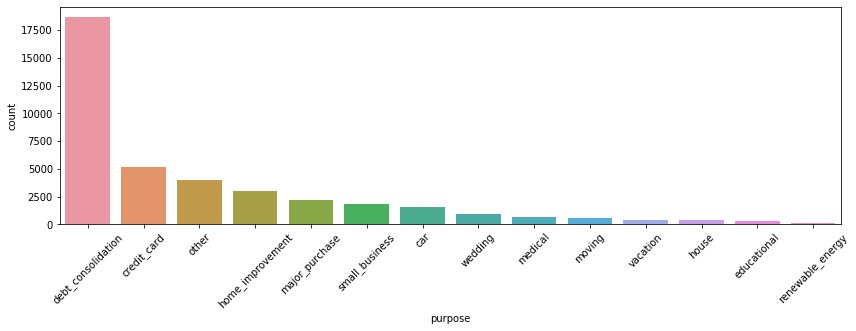

In [16]:
plt.figure(figsize=(14, 4))
plt.xticks(rotation=45)
# setting ordered frequency distribution
_ = sns.countplot(x='purpose', data=loan_df, order = loan_df['purpose'].value_counts().index)

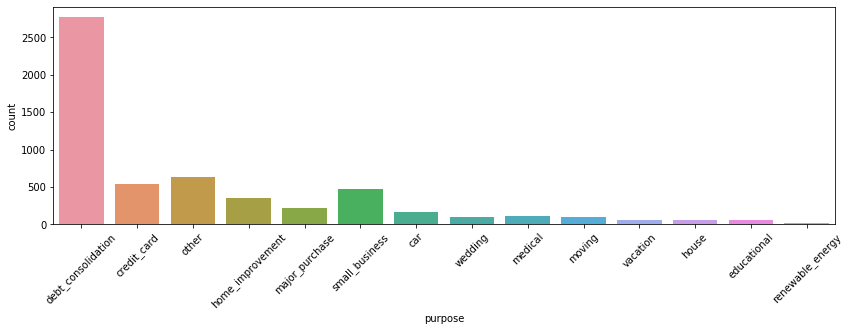

In [17]:
plt.figure(figsize=(14, 4))
plt.xticks(rotation=45)
# setting ordered frequency distribution
_ = sns.countplot(x='purpose', data=loan_df.query("loan_status == 'Charged Off'"), order = loan_df['purpose'].value_counts().index)

_**Observation:** Looks like top 4 purposes (freq/count wise) are:_
1. Debt Consolidation 
2. Credit Card
3. Other
4. Home Improvement 


In [18]:
# looks at different types of application
loan_df.groupby('application_type').count()['id']
# loan_df.columns

application_type
INDIVIDUAL    39717
Name: id, dtype: int64

_**Observation:**_ application_type column is totally useless as all of them are 'INDIVIDUAL', we should drop it


In [19]:
loan_df = loan_df.drop(['application_type'], axis=1)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,term_in_months,int_rate_percent
0,1077501,1296599,5000,5000,4975.0,162.87,B,B2,10.5,RENT,...,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0,36,10.65
1,1077430,1314167,2500,2500,2500.0,59.83,C,C4,0.5,RENT,...,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,60,15.27
2,1077175,1313524,2400,2400,2400.0,84.33,C,C5,10.5,RENT,...,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0,36,15.96
3,1076863,1277178,10000,10000,10000.0,339.31,C,C1,10.5,RENT,...,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0,36,13.49
4,1075358,1311748,3000,3000,3000.0,67.79,B,B5,1.0,RENT,...,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,0.0,60,12.69


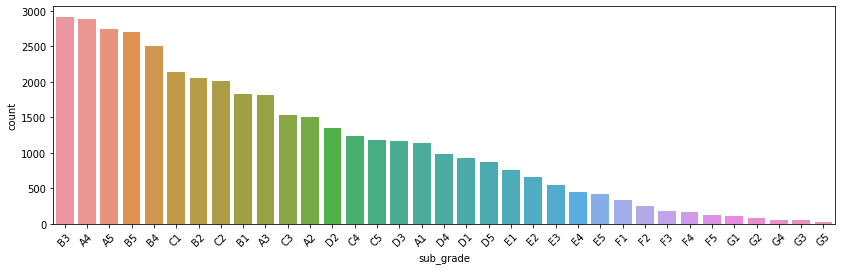

In [20]:
plt.figure(figsize=(14, 4))
plt.xticks(rotation=45)
_ = sns.countplot(x='sub_grade', \
                  data=loan_df, \
                  order = loan_df['sub_grade'].value_counts().index)

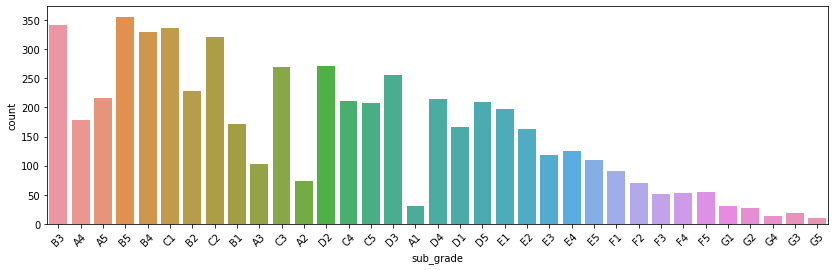

In [21]:
# setting ordered frequency distribution of grade for charged off loans as
plt.figure(figsize=(14, 4))
plt.xticks(rotation=45)
_ = sns.countplot(x='sub_grade', \
                  data=loan_df.query("loan_status == 'Charged Off'"), \
                  order = loan_df['sub_grade'].value_counts().index)

_**Observations:**_

1. Looking at the loans are distributed across different subgrade, in order `B* > A* > C* > D* > E* > F* > G*`
2. Some subgrade have lesser `Charged Off` such as `A1`, `A2`, `A3`, `A4`, `A5`, `B1` and `B2`; giving an insight that funds in A and top-tier B grade are lesser risky for investors.

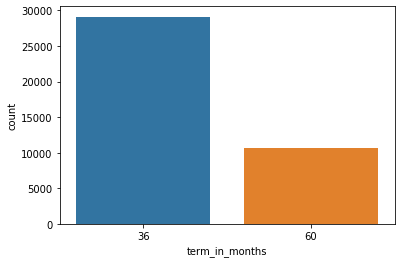

In [22]:
_ = sns.countplot(x="term_in_months", data=loan_df)

_**Observation:**_

1. We can find out that most of the loans are either 36 or 60 months term.
2. 36 month loans are approximately 3x of 60 month terms.

Text(0.5, 1.0, 'DTI vs Count')

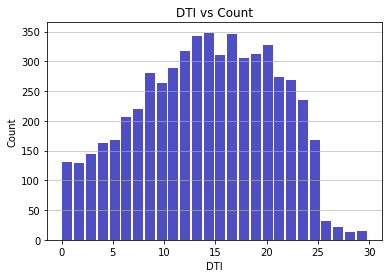

In [23]:
# _ = sns.distplot(loan_df.query("loan_status == 'Charged Off'")['dti'], bins=[0, 5, 10, 15, 20, 25, 30, 35])
n, bins, patches = plt.hist(x=loan_df.query("loan_status == 'Charged Off'")['dti'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('DTI vs Count')

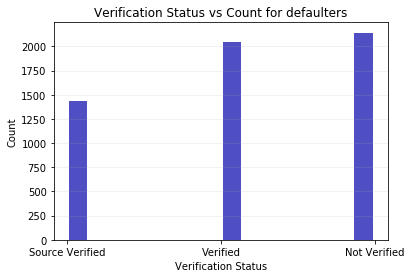

In [24]:
# verification status frequency for defaulters
n, bins, patches = plt.hist(x=loan_df.query("loan_status == 'Charged Off'")['verification_status'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.20)
plt.xlabel('Verification Status')
plt.ylabel('Count')
_ = plt.title('Verification Status vs Count for defaulters')

_**Observation:**_

1. Most of the charge off happens if Verification Status is not `Source Verified`

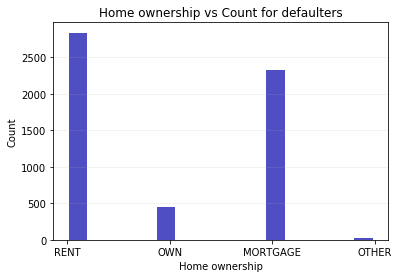

In [25]:
# home ownership frequency for defaulters
n, bins, patches = plt.hist(x=loan_df.query("loan_status == 'Charged Off'")['home_ownership'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.20)
plt.xlabel('Home ownership')
plt.ylabel('Count')
_ = plt.title('Home ownership vs Count for defaulters')

_**Observation:**_

1. Most of the charge off happens if home ownership is `RENT`, followed by `MORTGAGE`

## 4. Bivariate analysis: Try to discover correlations between two cols

1. Use scater plot to find any interesting relationship
2. Use pearson corrleation to discover relationship between different cols, taking two at a time

#### 4.1 Compare `loan_amnt` with `monthly_inc` to see if there is any corelation between them

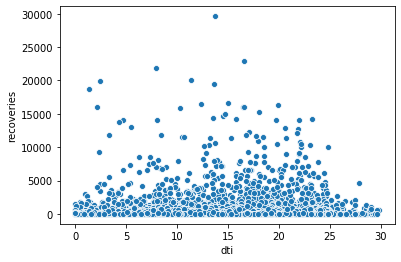

In [26]:
_ = sns.scatterplot(x="dti", y="recoveries", data=loan_df.query("loan_status == 'Charged Off'"))

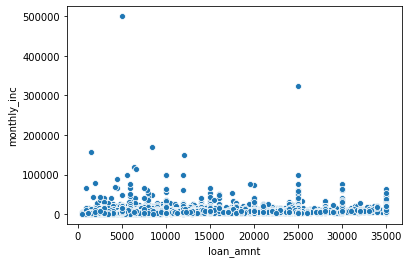

In [27]:
loan_df['monthly_inc'] = loan_df['annual_inc'].apply(lambda x: x/12.0)
_ = sns.scatterplot(x="loan_amnt", y="monthly_inc", data=loan_df.query("loan_status != 'Charged Off'"))

_**Observation:** Almost Useless_

People like to take fixed some amounts as loans like, 5k, 10k, 15k, 20k, 25k, 30k and 35k and looks 25k is most popular

#### 4.2 Compare `loan_amnt` with `monthly_inc` to see if there is any corelation between them

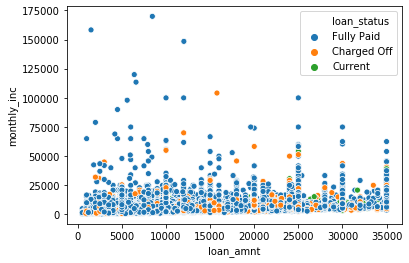

In [28]:
_ = sns.scatterplot(x="loan_amnt", y="monthly_inc", hue="loan_status",  data=loan_df.query('monthly_inc < 200000'))

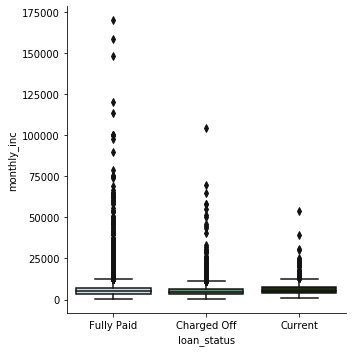

In [29]:
_ = _ = sns.catplot(x='loan_status', y="monthly_inc", kind="box", palette="ch:1.5", data=loan_df.query('monthly_inc < 200000'))

_**Observation:**_

1. We can see that monthly income for defaulters is significantly lower than others

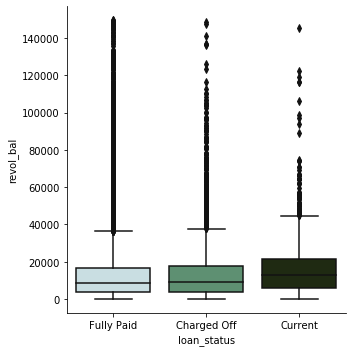

In [30]:
_ = sns.catplot(x="loan_status", y='revol_bal', kind="box", palette="ch:1.5", data=loan_df);

#### 4.3 Compare `pub_rec_bankruptcies` with `loan_status` to see if there is any corelation between them

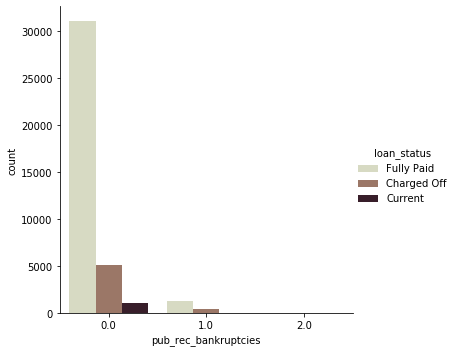

In [31]:
_ = sns.catplot(x="pub_rec_bankruptcies", hue='loan_status', kind="count", palette="ch:.50",data=loan_df)
# _ = _.set(yscale="log")

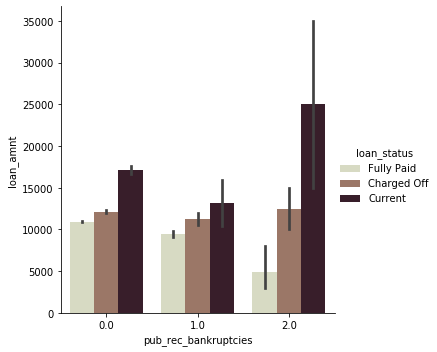

In [32]:
_ = sns.catplot(x="pub_rec_bankruptcies", y="loan_amnt", hue='loan_status', kind="bar", palette="ch:.50", data=loan_df);

_**Observation:**_

1. If `pub_rec_bankruptcies` == 2 there are significant chances of `Charge Off` if loan amount increase beyond 5k.

#### 4.4 Compare `term_in_months` with `loan_status` to see if there is any corelation between them
1. Freqency 
2. Loan Amount

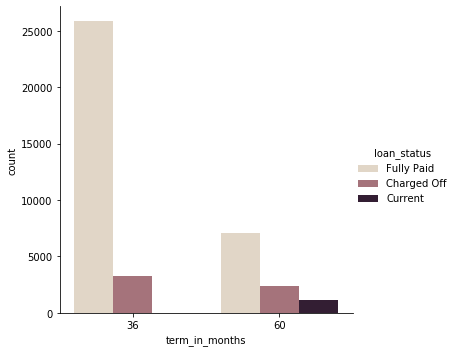

In [33]:
_ = sns.catplot(x="term_in_months", hue='loan_status', kind="count", palette="ch:.25", data=loan_df);

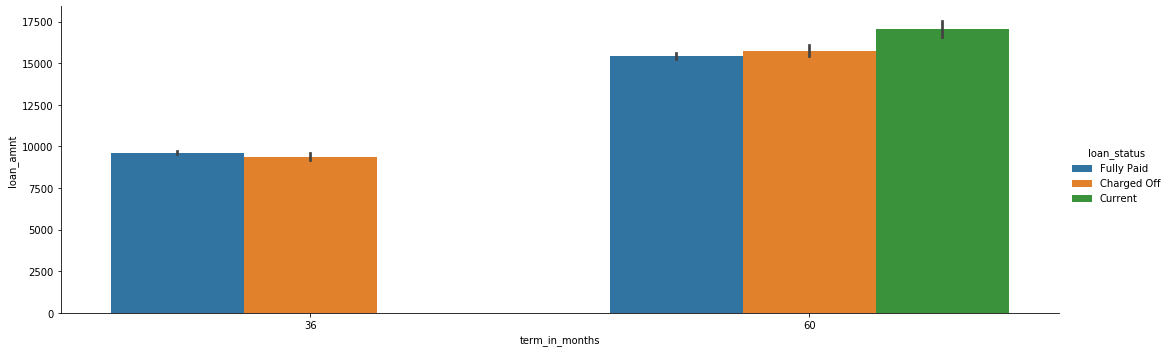

In [34]:
_ = sns.catplot(x="term_in_months", y='loan_amnt', hue='loan_status', height=5, aspect=3, kind="bar", data=loan_df)

_**Observation:**_ 

1. We see all the loans which are 36 months, are either `Fully Paid` or `Charged Off` none of them are running
2. Risk of `Charge Off` increases with the payment term increase.

#### 4.5 Compare `open_acc` with `loan_status` to see if there is any corelation between them
1. Freqency 
2. Loan Amount

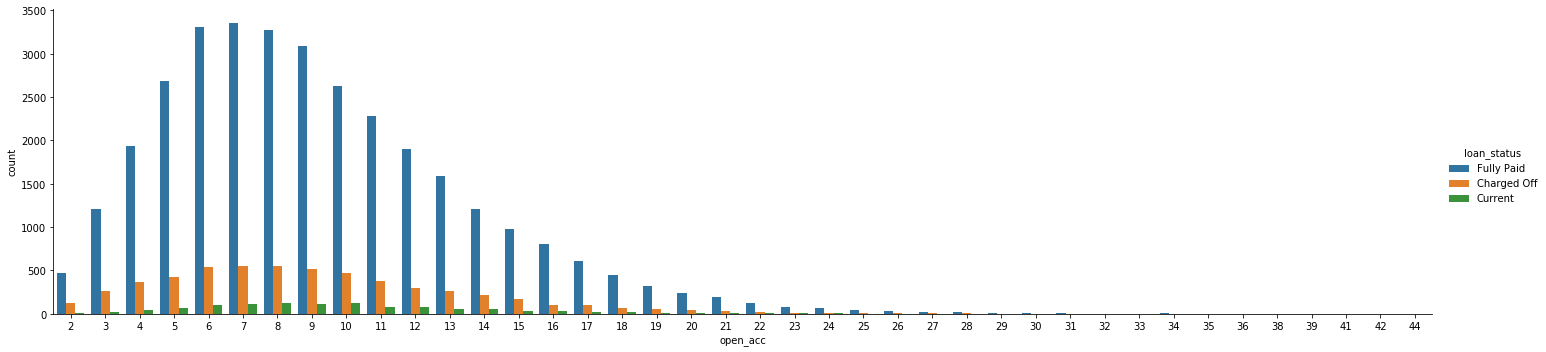

In [35]:
_ = sns.catplot(x="open_acc", \
                hue='loan_status', \
                kind="count", \
                height=5, aspect=4, data=loan_df);

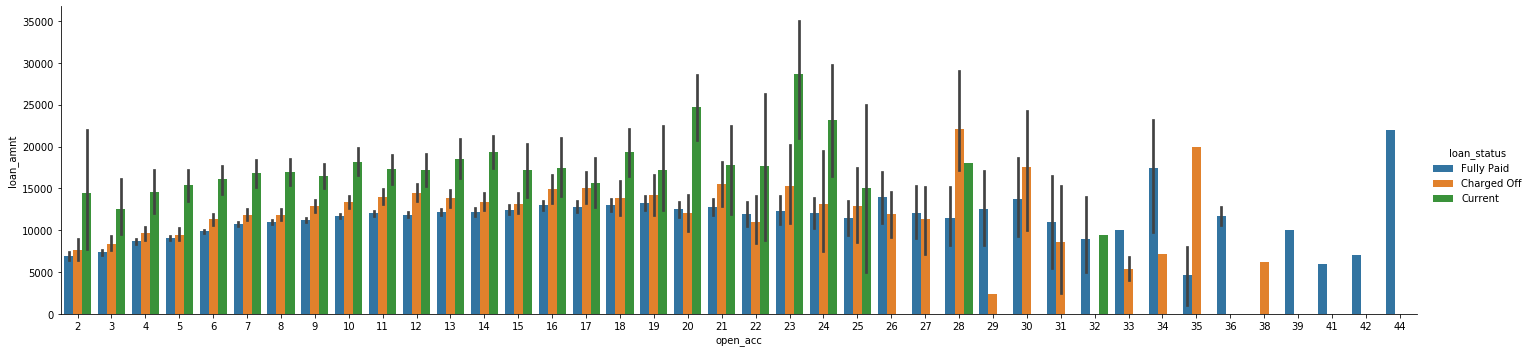

In [36]:
_ = sns.catplot(x="open_acc", \
                y='loan_amnt', \
                hue='loan_status', \
                kind="bar", \
                height=5, aspect=4, data=loan_df);

_**Observation:**_ charge offsignificantly reduces when open credit line(`open_acc`) is more than 35.

#### 4.6 Compare `addr_state` with `loan_status` to see if there is any corelation between them
1. Freqency 
2. Loan Amount

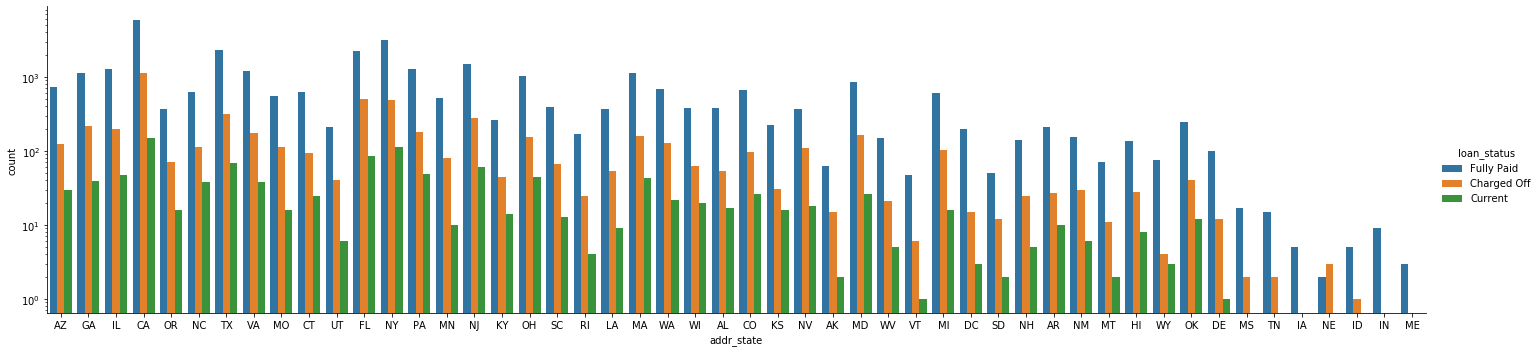

In [37]:
_ = sns.catplot(x="addr_state", \
                hue='loan_status', \
                kind="count", \
                height=5, aspect=4, data=loan_df)
_ = _.set(yscale="log")

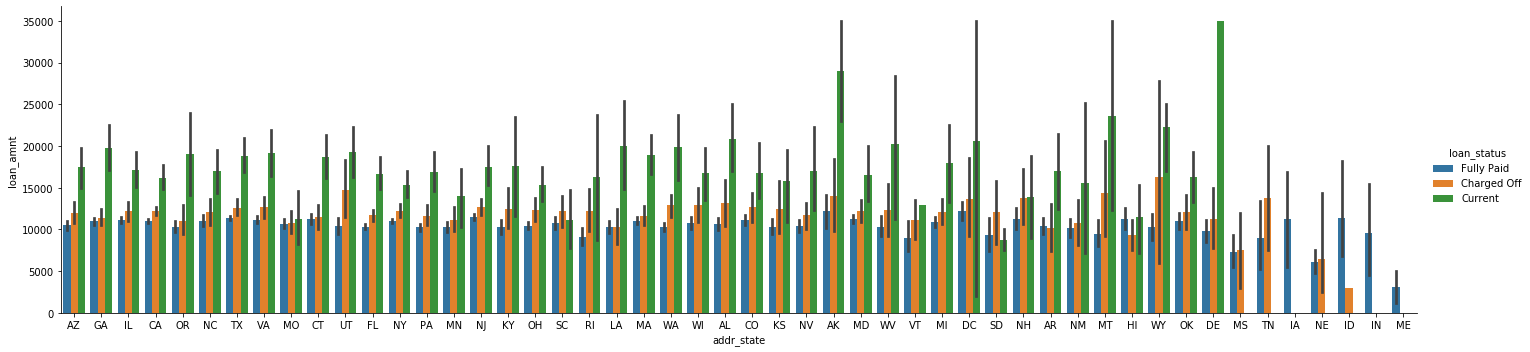

In [38]:
_ = sns.catplot(x="addr_state", \
                y='loan_amnt', \
                hue='loan_status', \
                kind="bar", \
                height=5, aspect=4, data=loan_df)

_**Observation:**_ charge offs are absent in states, 'IA', 'IN', 'ME'.

#### 4.7 Compare `home_ownership` with `loan_status` to see if there is any corelation between them
1. Freqency 
2. Loan Amount

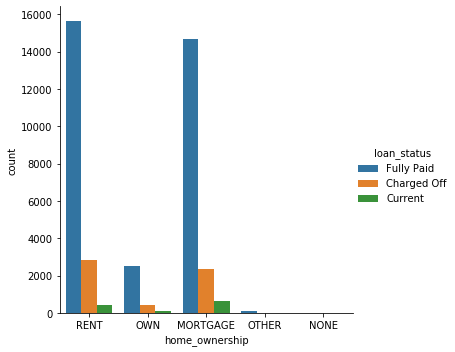

In [39]:
_ = sns.catplot(x="home_ownership", hue='loan_status', kind="count", data=loan_df);

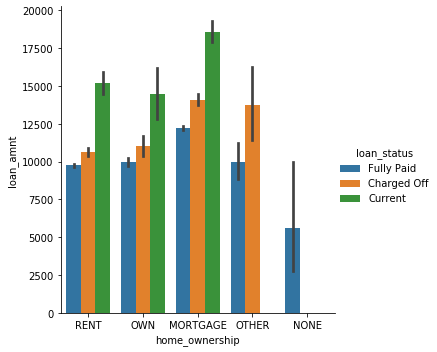

In [40]:
_ = sns.catplot(x="home_ownership", y='loan_amnt', hue='loan_status', kind="bar", data=loan_df);

_**Observation:**_ 

1. Risk in `RENT` and `MORTGAGE` house is highger, along with risk in contrast to other categories.
1. There is no charge off for `OTHER` and `NONE` home ownership category.

#### 4.8 Compare `ourpose` with `loan_status` to see if there is any corelation between them
1. Freqency 
2. Loan Amount

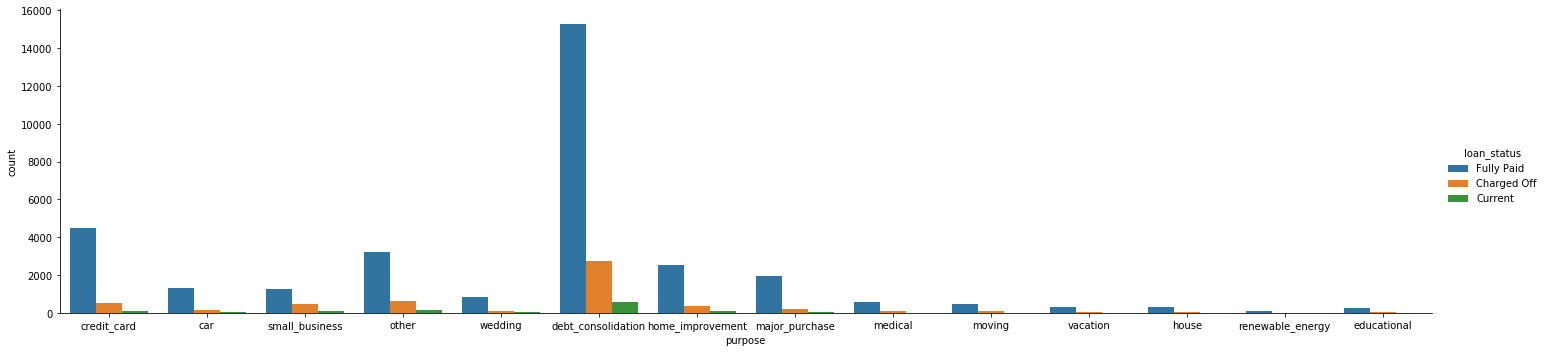

In [41]:
_ = sns.catplot(x="purpose", hue="loan_status", kind="count",  height=5, aspect=4, data=loan_df)
# _ = _.set(yscale="log")

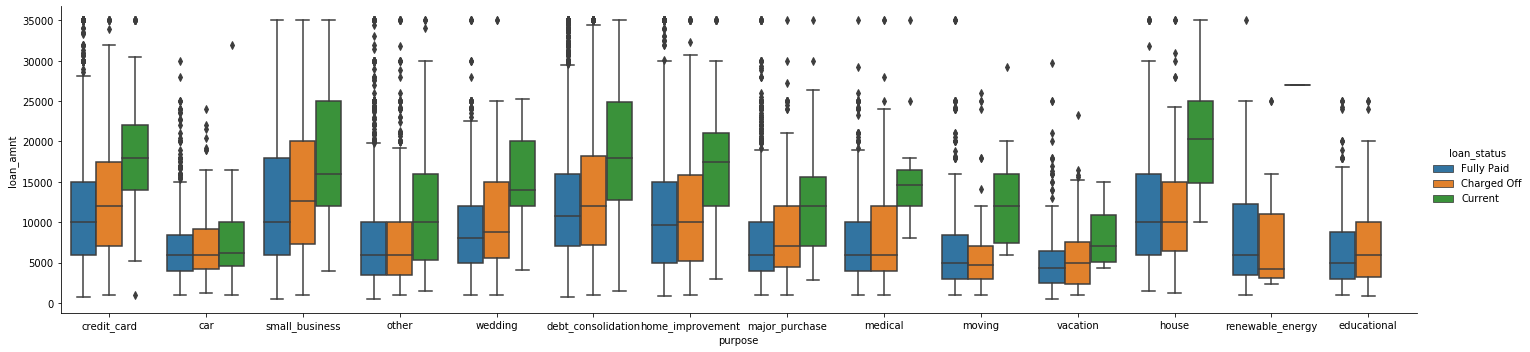

In [42]:
_ = sns.catplot(x="purpose", y="loan_amnt", hue="loan_status", kind="box",  height=5, aspect=4, data=loan_df)

_**Observation:**_ Most of the charge off(lost payment) occurs to loan amount between 7.5k to 17.5k for small businesses

## 5. Multivariate analysis: Try to discover correlations between cols

Use pearson corrleation to discover relationship between multiple cols

In [43]:
# create derived metrics for pearson corrlation to work

# loan_status: Charged Off, Current, Fully Paid
loan_df['ls_charged_off'] = loan_df.loan_status.apply(lambda x: 1 if x == 'Charged Off' else 0)
loan_df['ls_current'] = loan_df.loan_status.apply(lambda x: 1 if x == 'Current' else 0)
loan_df['ls_fully_paid'] = loan_df.loan_status.apply(lambda x: 1 if x == 'Fully Paid' else 0)


# verification_status: Not Verified, Source Verified, Verified
loan_df['vs_not_verified'] = loan_df.verification_status.apply(lambda x: 1 if x == 'Not Verified' else 0)
loan_df['vs_source_verified'] = loan_df.verification_status.apply(lambda x: 1 if x == 'Source Verified' else 0)
loan_df['vs_verified'] = loan_df.verification_status.apply(lambda x: 1 if x == 'Verified' else 0)

In [44]:
loan_df_without_id = loan_df.copy().drop(['id', 'member_id'], axis=1)
corr = loan_df_without_id.corr().dropna(axis=1, how='all')

# plot some graphs for viz
cmap = sns.diverging_palette(5, 100, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

# save heatmap to excel
# corr.style.background_gradient(cmap, axis=1)\
#     .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
#     .set_caption("Hover to magify")\
#     .set_table_styles(magnify())\
#     .set_precision(2)\
#     .to_excel('a.xlsx', engine='openpyxl')

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())\
    .set_precision(2)


_**Observation:**_

1. Positive correlation between installments with loan_amnt, funded_amt, funded_amnt_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, and total_rec_int
2. There is a positive correlation between `pub_rec_bankruptcies` with `mths_since_last_record` and `pub_rec`.
3. Positive correlation between open_acc, and total_acc (expected)
4. Positive correlation between verification status: Verified and `loan_amnt`, `funded_amnt`, `funded_amnt_inv` and	`installment`


## 5. Compiling the observations

_**Observation:** Looks like top 4 purposes (freq/count wise) are:_
1. Debt Consolidation 
2. Credit Card
3. Other
4. Home Improvement 


_**Observation:** Looks like top 4 purposes (freq/count wise) are:_
1. Debt Consolidation 
2. Credit Card
3. Other
4. Home Improvement 


_**Observation:**_

1. We can find out that most of the loans are either 36 or 60 months term.
2. 36 month loans are approximately 3x of 60 month terms.

_**Observation:**_

1. Most of the charge off happens if Verification Status is not `Source Verified`

_**Observation:**_

1. Most of the charge off happens if home ownership is `RENT`, followed by `MORTGAGE`

_**Observation:**_

1. We can see that monthly income for defaulters is significantly lower than others

_**Observation:**_

1. If `pub_rec_bankruptcies` == 2 there are significant chances of `Charge Off` if loan amount increase beyond 5k.

_**Observation:**_ charge offsignificantly reduces when open credit line(`open_acc`) is more than 35.

_**Observation:**_ charge offs are absent in states, 'IA', 'IN', 'ME'.

_**Observation:**_ 

1. Risk in `RENT` and `MORTGAGE` house is highger, along with risk in contrast to other categories.
1. There is no charge off for `OTHER` and `NONE` home ownership category.

_**Observation:**_

1. Positive correlation between installments with loan_amnt, funded_amt, funded_amnt_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, and total_rec_int
2. There is a positive correlation between `pub_rec_bankruptcies` with `mths_since_last_record` and `pub_rec`.
3. Positive correlation between open_acc, and total_acc (expected)
4. Positive correlation between verification status: Verified and `loan_amnt`, `funded_amnt`, `funded_amnt_inv` and	`installment`
